# DC Real Estate Analysis
Isolating qualified sales, where are the condominiumsand residentialwith the cheapest associated cost/sf in the city?Due to market fluctuations in real estate values since emerging from the Great Recession, we should have a data set that focuses on sales within the past five years and ten years, respectively. Also paying attention to which broad areas have the highest turnover.  

In [1]:
#Dependencies
import pandas as pd
import numpy as np
import plotly.plotly as py
import datetime

#CSV File to load
file_to_load = "/Users/matthewpetroff/Desktop/Project_1/Data_dc-residential-properties/DC_Properties.csv"
#print ('goodpath')

#Read file and store into Pandas DF. Scatter plots with price and 
real_estate_data_pd = pd.read_csv(file_to_load)
real_estate_data_pd.head()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning:

Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.



,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,...,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,...,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,...,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,...,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,...,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,...,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


# Variable Removal

In [2]:
#Clean DF to remove all unrelated variables
isolated_pd = real_estate_data_pd.drop(columns=["Unnamed: 0", "BATHRM", "HF_BATHRM", "HEAT", "AC", "NUM_UNITS", 
                                                "ROOMS", "BEDRM", "AYB", "YR_RMDL", "EYB", "STORIES", "SALE_NUM", 
                                                "BLDG_NUM", "GRADE", "CNDTN", "EXTWALL", "ROOF", "INTWALL",
                                                "KITCHENS", "FIREPLACES", "USECODE", "GIS_LAST_MOD_DTTM",
                                                "CMPLX_NUM", "ASSESSMENT_NBHD", "ASSESSMENT_SUBNBHD", 
                                                "CENSUS_TRACT", "CENSUS_BLOCK", "QUADRANT", "X", "Y"])
isolated_pd.head()

,SALEDATE,PRICE,QUALIFIED,GBA,STYLE,STRUCT,LANDAREA,SOURCE,LIVING_GBA,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,WARD,SQUARE
0,2003-11-25 00:00:00,1095000.0,Q,2522.0,3 Story,Row Inside,1680,Residential,NaN,1748 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23061 09289,38.914680,-77.040832,Ward 2,152
1,2000-08-17 00:00:00,NaN,U,2567.0,3 Story,Row Inside,1680,Residential,NaN,1746 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23067 09289,38.914683,-77.040764,Ward 2,152
2,2016-06-21 00:00:00,2100000.0,Q,2522.0,3 Story,Row Inside,1680,Residential,NaN,1744 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23074 09289,38.914684,-77.040678,Ward 2,152
3,2006-07-12 00:00:00,1602000.0,Q,2484.0,3 Story,Row Inside,1680,Residential,NaN,1742 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23078 09288,38.914683,-77.040629,Ward 2,152
4,NaN,NaN,U,5255.0,3 Story,Semi-Detached,2032,Residential,NaN,1804 NEW HAMPSHIRE AVENUE NW,WASHINGTON,DC,20009.0,18S UJ 23188 09253,38.914383,-77.039361,Ward 2,152


# Calculations for Total Sales and Average Cost/SF

In [3]:
#DF for qualified residential properties (n=45,976 <-- differs from final count below?)
dirty_resi_pd = isolated_pd.drop(columns=["LIVING_GBA"])
resi_pd_0 = dirty_resi_pd.drop(dirty_resi_pd[dirty_resi_pd.SOURCE == "Condominium"].index)
resi_pd_1 = resi_pd_0.drop(resi_pd_0[resi_pd_0.QUALIFIED == "U"].index)
#resi_pd_1.shape

#Calulate cost/sf (PRICE/GBA) and append to resi_pd_1. 
resi_pd_1['COST_SF_RESI'] = resi_pd_1['PRICE']/resi_pd_1['GBA']
resi_pd_1.head()

#Average Cost/sf & count
ave_resi_pd = resi_pd_1.loc[:,["COST_SF_RESI"]]
ave_resi = ave_resi_pd.mean()[0]
count_resi = ave_resi_pd.count()[0]
#print (ave_resi)
#print (count_resi)

In [4]:
#DF for qualified residential properties (n=30,373<-- differs from final count below?)
dirty_condo_pd = isolated_pd.drop(columns=["GBA"])
condo_pd_0 = dirty_condo_pd.drop(dirty_condo_pd[dirty_condo_pd.SOURCE == "Residential"].index)
condo_pd_1 = condo_pd_0.drop(condo_pd_0[condo_pd_0.QUALIFIED == "U"].index)
#condo_pd_1.shape

#Calulate cost/sf (PRICE/LIVING_GBA) and append to condo_pd_1. 
condo_pd_1['COST_SF_CONDO'] = condo_pd_1['PRICE']/condo_pd_1['LIVING_GBA']
#condo_pd_1.head()

#Average Cost/sf & count
ave_condo_pd = condo_pd_1.loc[:,["COST_SF_CONDO"]]
ave_condo = ave_condo_pd.mean()[0]
count_condo = ave_condo_pd.count()[0]
#print (ave_condo)
#print (count_condo)

# Summary Diagram -- Count and Cost/SF

In [5]:
#Summary Diagram
sale_analysis_summary = pd.DataFrame({
    "Total Number of Residential Sales":count_resi,
    "Average Residential Purchase Price":ave_resi,
    "Total Number of Condominium Sales":count_condo,
    "Average Condominium Purchase Price":ave_condo}, [0])
sale_analysis_summary.round(decimals=2)

,Total Number of Residential Sales,Average Residential Purchase Price,Total Number of Condominium Sales,Average Condominium Purchase Price
0,45886,355.88,30347,482.9


# Turnover Analysis -- Isolated by Ward & Square
##### Turnover is one of the metrics to measure the growth and overall market of a region. Areas with high turnover usually signify a strong economy and more desirable area to invest. 

In [6]:
#Concatinate qualified condo & resi dataframes
resi_turn_pd = resi_pd_1.loc[:,["WARD", "SQUARE"]]
condo_turn_pd = condo_pd_1.loc[:,["WARD", "SQUARE"]]
frames = [resi_turn_pd, condo_turn_pd]
turnover_pd = pd.concat(frames)
#turnover_pd.head()

turn_count = turnover_pd.groupby(["WARD"]).count()["SQUARE"]
turn_count

turn = pd.DataFrame({
    "Turover by Ward":turn_count})
turn

,Turover by Ward
WARD,
Ward 1,9540
Ward 2,12725
Ward 3,11273
Ward 4,9493
Ward 5,9332
Ward 6,13331
Ward 7,6511
Ward 8,4144


# Sale Date Analysis
##### Where have the most sales occurred within the last five and ten years? Where have prices increased the most and least? Since we do not have addresses on the condos, we can use Wards and/or Zip Codes. There are eight Wards and 65 zip codes. We could fine tune it by using the binning and group method, however, that may be fairly time consuming. 

In [7]:
BINS = [1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2014, 2019]
GROUPS = ["1940-1949", "1950-1959", "1960-1969", "1970-1979", 
          "1980-1989", "1990-1999", "2000-2009", "2010-2014", "2015-2019"]

#isolating year - resi
resi_date_pd2 = resi_pd_1.loc[:,["WARD", "COST_SF_RESI", "SALEDATE"]]
resi_date_pd2["SALEDATE"] = resi_date_pd2["SALEDATE"].astype(str)
resi_date_pd2["YEAR"] = resi_date_pd2["SALEDATE"].astype(str).str[:4]
resi_date_pd2 = resi_date_pd2.loc[resi_date_pd2.YEAR != "nan"]
resi_date_pd2["DATE_B"] = pd.cut(resi_date_pd2["YEAR"].astype(int),BINS,labels=GROUPS)
resi_total_date = resi_date_pd2["DATE_B"].value_counts()
resi_total_ward = resi_date_pd2["WARD"].value_counts()
resi_percent = resi_total_date / count_resi * 100
#resi_date_pd2.head()

#isolating year - condo
condo_date_pd2 = condo_pd_1.loc[:,["WARD", "COST_SF_CONDO", "SALEDATE"]]
condo_date_pd2["SALEDATE"] = condo_date_pd2["SALEDATE"].astype(str)
condo_date_pd2["YEAR"] = condo_date_pd2["SALEDATE"].astype(str).str[:4]
condo_date_pd2 = condo_date_pd2.loc[condo_date_pd2.YEAR != "nan"]
condo_date_pd2["DATE_B"] = pd.cut(condo_date_pd2["YEAR"].astype(int),BINS,labels=GROUPS)
condo_total_date = condo_date_pd2["DATE_B"].value_counts()
condo_percent = condo_total_date / count_condo * 100
#condo_date_pd2.head()

In [8]:
#Summary DataFrame - Resi
resi_date_sum = pd.DataFrame({"Total Count": resi_total_date,
                              "Percent of Share": resi_percent})
resi_date_sum = resi_date_sum.sort_index()
resi_date_sum.round(decimals=2)

,Total Count,Percent of Share
1940-1949,0,0.00
1950-1959,0,0.00
1960-1969,1,0.00
1970-1979,4,0.01
1980-1989,20,0.04
1990-1999,4748,10.35
2000-2009,15452,33.67
2010-2014,11972,26.09
2015-2019,13778,30.03


In [9]:
#Summary DataFrame - Condo
condo_date_sum = pd.DataFrame({"Total Count": condo_total_date,
                              "Percent of Share": condo_percent})
condo_date_sum = condo_date_sum.sort_index()
condo_date_sum.round(decimals=2)

,Total Count,Percent of Share
1940-1949,0,0.00
1950-1959,0,0.00
1960-1969,0,0.00
1970-1979,1,0.00
1980-1989,4,0.01
1990-1999,1338,4.41
2000-2009,10616,34.98
2010-2014,8052,26.53
2015-2019,10362,34.15


# Figures

In [10]:
import matplotlib.pyplot as plt

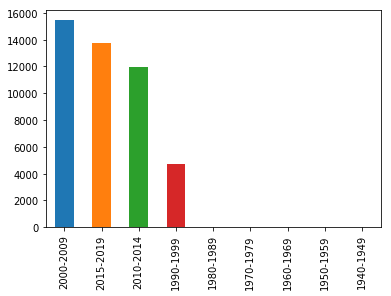

In [11]:
resi_date_pd2.DATE_B.value_counts().plot(kind="Bar")
plt.show()

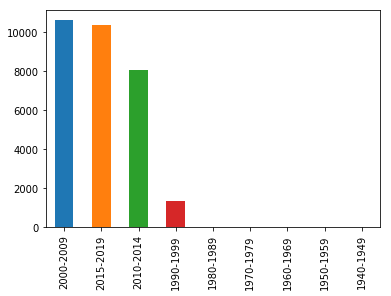

In [12]:
condo_date_pd2.DATE_B.value_counts().plot(kind="Bar")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

ig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
number_of_houses = ["15452 ,2000-2009",
          "11972 ,2010-2014",
          "13778 ,2015-2019",
          ]
data = [float(x.split()[0]) for x in number_of_houses]
houses = [x.split()[-1] for x in number_of_houses]
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)
wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))
ax.legend(wedges, houses,
          title="Number of houses",
          loc ="center left",
          bbox_to_anchor=(1, 1,0, 1))
ax.legend(loc='Upper Left')
plt.setp(autotexts, size=8, weight="bold")
ax.set_title("Number of Residential Houses")
houses
labels = ['2000-2009', '2010-2014', '2015-2019']
colors = ['b', 'o', 'g']
plt.legend(labels,loc=3)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))
number_of_houses = ["10616 ,2000-2009",
          "8052 ,2010-2014",
          "10362 ,2015-2019",
          ]
data = [float(x.split()[0]) for x in number_of_houses]
houses = [x.split()[-1] for x in number_of_houses]
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)
wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))
ax.set_title("Number of Residential Condos")
labels = ['2000-2009', '2010-2014', '2015-2019']
colors = ['b', 'o', 'g']
plt.legend(labels,loc=3)
plt.show()

# Statistical Analysis